In [64]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline

In [65]:
pw2014_ini=pd.read_csv('homeF_2014_merge_2.csv')
pw2015_ini=pd.read_csv('homeF_2015_merge_2.csv')

In [66]:
power = pd.concat([pw2014_ini,pw2015_ini],axis=0,ignore_index=True)

In [67]:
power.head()

,Date & Time,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
1,2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
2,2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
3,2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,...,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
4,2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0


In [68]:
#將標題儲存下來
cols=power.columns

In [69]:
#概況
target='Usage [kW]'
power[target].describe()

count    70080.000000
mean         1.315627
std          1.459243
min          0.000000
25%          0.438579
50%          0.815740
75%          1.284938
max         20.819441
Name: Usage [kW], dtype: float64

In [70]:
#先將Usage的數據儲存下來並且drop掉NaN,與最後一個小時的數據

empty = pd.DataFrame(columns=['Usage [kW]']) #造一個空的dataframe
X=power[['Usage [kW]']]
Past1=X.drop([35040,70073,70074,70075,70076,70077,70078,70079,70080,70081])
Next1=X.drop([0,1,2,3,4,5,6,7,35040,70081])
Past = pd.concat([empty,Past1],axis=0,ignore_index=True)
Next = pd.concat([empty,Next1],axis=0,ignore_index=True)
Past=Past.values
Next=Next.values

In [71]:
#drop掉最初一個小時的數據以及NaN

power_empty=pd.DataFrame(columns=cols)#造一個空的dataframe
power_t=power.drop([0,1,2,3,35040,70077,70078,70079,70080,70081 ])
power_= pd.concat([power_empty,power_t],axis=0,ignore_index=True)

In [72]:
#再將Past集合加入dataframe 就成為前一個小時的電量了
New_power=pd.concat([power_, pd.DataFrame(columns=list(['an_hour_Past_Usage [kW]','an_hour_Next_Usage [kW]']))])#將空的一個小時前欄位加入
New_power['an_hour_Past_Usage [kW]']=Past  #將資料加入上述欄位
New_power['an_hour_Next_Usage [kW]']=Next
#重新排序欄位
last_col = New_power.pop(New_power.columns[-1])
New_power.insert(2, last_col.name, last_col)
last_col = New_power.pop(New_power.columns[-1])
New_power.insert(3, last_col.name, last_col)
New_power.head()


,Date & Time,Usage [kW],an_hour_Next_Usage [kW],an_hour_Past_Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 01:00:00,0.307616,0.378931,0.977402,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
1,2014-01-01 01:15:00,0.396122,0.301320,0.377746,0.010278,0.001511,0.010278,0.124819,0.002258,0.008111,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
2,2014-01-01 01:30:00,0.272560,0.280731,0.420196,0.010127,0.000118,0.010127,0.002522,0.002678,0.008587,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
3,2014-01-01 01:45:00,0.320803,0.456980,0.290328,0.010244,0.000298,0.010244,0.023630,0.002581,0.008497,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
4,2014-01-01 02:00:00,0.378931,0.448540,0.307616,0.010218,0.001389,0.010218,0.114904,0.002516,0.008121,...,10.0,Clear,8.99,1024.41,7.65,0.0,257.0,0.0,3.62,0.0


In [73]:
New_power=New_power.drop([ 'Generation [kW]', 'WaterHeater [kW]',
       'Solar [kW]', 'Refrigerator [kW]', 'Microwave [kW]', 'Furnace [kW]',
       'WaterHeater3 [kW]', 'WaterHeater2 [kW]', 'WaterHeater1 [kW]',
       'Master_Bdrm [kW]', 'Front_Bdrm [kW]', 'Kit_StoveWall [kW]',
       'Dishwasher_Disposal [kW]', 'Kit_SinkWall [kW]', 'Family_Rm [kW]',
       'Kit_Half-Bath_Foyer [kW]', 'Washing_Machine [kW]',
       'Guest_Bdrm_SmkDet [kW]', 'Dryer [kW]', 'Basement [kW]', 'Phase_B [kW]',
       'Phase_A [kW]'], axis=1)

In [74]:
empty = pd.DataFrame(columns=['temperature','visibility','apparentTemperature','windSpeed']) #造一個空的dataframe
X=power[['temperature','visibility','apparentTemperature','windSpeed']]
Past1=X.drop([35040,70073,70074,70075,70076,70077,70078,70079,70080,70081])
Past = pd.concat([empty,Past1],axis=0,ignore_index=True)
Past_t=Past['temperature'].values
Past_v=Past['visibility'].values
Past_a=Past['apparentTemperature'].values
Past_w=Past['windSpeed'].values

In [75]:
#再將Past集合加入dataframe 就成為前一個小時的電量了
New_power=pd.concat([New_power, pd.DataFrame(columns=list(['Past_temperature','Past_visibility','Past_apparentTemperature','Past_windSpeed']))])#將空的一個小時前欄位加入

#將資料加入上述欄位
New_power['Past_temperature']=Past_t
New_power['Past_visibility']=Past_v
New_power['Past_apparentTemperature']=Past_a
New_power['Past_windSpeed']=Past_w

#重新排序欄位
for i in range(0,4):
     last_col = New_power.pop(New_power.columns[-1])
     New_power.insert(2, last_col.name, last_col)

New_power.head()

,Date & Time,Usage [kW],Past_temperature,Past_visibility,Past_apparentTemperature,Past_windSpeed,an_hour_Next_Usage [kW],an_hour_Past_Usage [kW],year,mon,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 01:00:00,0.307616,20.85,10.0,8.33,12.83,0.378931,0.977402,2014.0,1.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
1,2014-01-01 01:15:00,0.396122,20.85,10.0,8.33,12.83,0.301320,0.377746,2014.0,1.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
2,2014-01-01 01:30:00,0.272560,20.85,10.0,8.33,12.83,0.280731,0.420196,2014.0,1.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
3,2014-01-01 01:45:00,0.320803,20.85,10.0,8.33,12.83,0.456980,0.290328,2014.0,1.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
4,2014-01-01 02:00:00,0.378931,19.72,10.0,8.49,10.03,0.448540,0.307616,2014.0,1.0,...,10.0,Clear,8.99,1024.41,7.65,0.0,257.0,0.0,3.62,0.0


In [76]:
Y=[]
X=New_power['hr'].values
for i in range(0, 70072): 
    if (X[i] >= 17)and(X[i] <=21) :
        Y.append(1)
    else :
        Y.append(0)

In [77]:
New_power=pd.concat([New_power, pd.DataFrame(columns=list(['is_Peak period']))])#將空的一個小時前欄位加入
New_power['is_Peak period']=Y
last_col = New_power.pop(New_power.columns[-1])
New_power.insert(2, last_col.name, last_col)
New_power.head()

,Date & Time,Usage [kW],is_Peak period,Past_temperature,Past_visibility,Past_apparentTemperature,Past_windSpeed,an_hour_Next_Usage [kW],an_hour_Past_Usage [kW],year,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 01:00:00,0.307616,0,20.85,10.0,8.33,12.83,0.378931,0.977402,2014.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
1,2014-01-01 01:15:00,0.396122,0,20.85,10.0,8.33,12.83,0.301320,0.377746,2014.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
2,2014-01-01 01:30:00,0.272560,0,20.85,10.0,8.33,12.83,0.280731,0.420196,2014.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
3,2014-01-01 01:45:00,0.320803,0,20.85,10.0,8.33,12.83,0.456980,0.290328,2014.0,...,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
4,2014-01-01 02:00:00,0.378931,0,19.72,10.0,8.49,10.03,0.448540,0.307616,2014.0,...,10.0,Clear,8.99,1024.41,7.65,0.0,257.0,0.0,3.62,0.0


In [94]:
X = New_power[['time','an_hour_Past_Usage [kW]','is_Peak period','hr', 'is_holiday','Past_temperature','Past_visibility','Past_apparentTemperature']]
Y = New_power[['Usage [kW]']]

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.167,shuffle=False)

In [96]:
#建立並訓練模型

regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#將多項式迴歸模型擬合到兩個分量X_train和Y_train上。

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 

poly.fit(X_poly, Y_train) 
regressor2 = LinearRegression() 
regressor2.fit(X_poly, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

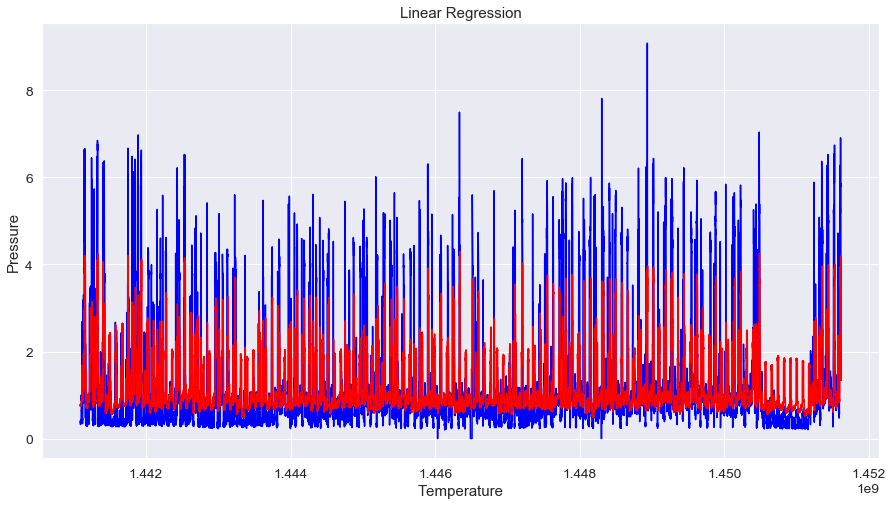

In [98]:
#我們可視化線性迴歸結果。

Y_pred= regressor.predict(X_test)
plt.figure(figsize=(15,8))
plt.plot(X_test['time'], Y_test, color = 'blue') 
plt.plot(X_test['time'],  Y_pred, color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

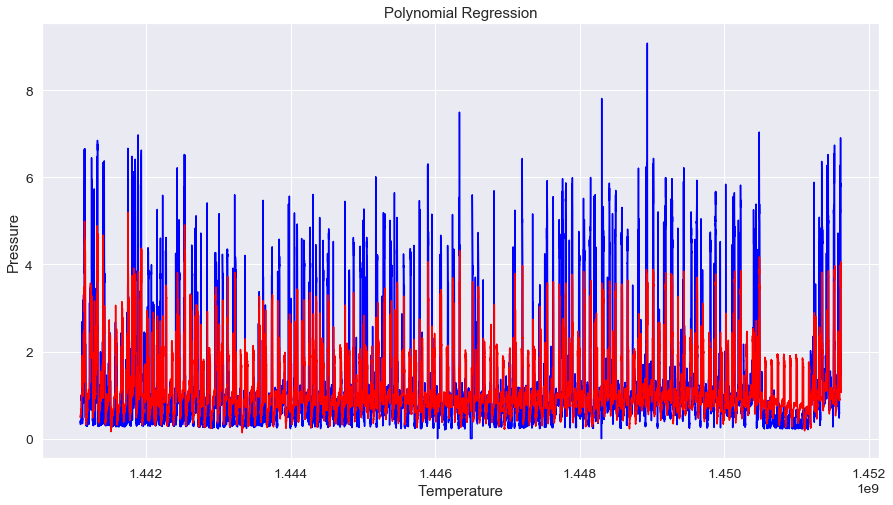

In [99]:
# 可視化多項式迴歸結果。 

Y_pred2=regressor2.predict(poly.fit_transform(X_test))
plt.figure(figsize=(15,8))
plt.plot(X_test['time'], Y_test, color = 'blue') 
plt.plot(X_test['time'], Y_pred2, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

In [102]:
#平均絕對誤差(MAE)、均方誤差(MSE)、均方根誤差(RMSE)
print('linear:')
print('*Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print(' ')  
print('檢查準確度(%): ',regressor.score(X_train, Y_train)*100)

linear:
*Mean Absolute Error: 0.6219131002966021
Mean Squared Error: 0.9383337635180822
Root Mean Squared Error: 0.9686762944957836
 
檢查準確度(%):  30.178937053593923


In [103]:
#平均絕對誤差(MAE)、均方誤差(MSE)、均方根誤差(RMSE)
print('polynomial:')
print('*Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))

polynomial:
*Mean Absolute Error: 0.6108934595532916
Mean Squared Error: 0.9450531582770983
Root Mean Squared Error: 0.9721384460441312
